In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  

In [2]:
claims = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
customer_data = pd.read_csv(r"C:\Users\Anonymous\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
customer_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions

In [4]:
combined_data = pd.merge(claims,customer_data, left_on = 'customer_id', right_on = 'CUST_ID', how = 'inner')
combined_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [5]:
print(combined_data.dtypes)
print('Yes, there are mismatch in the column datatypes. For e.g. Claim_date & DateOfBirth are in object datatype .It should have been in datetime64(ns) format.')

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object
Yes, there are mismatch in the column datatypes. For e.g. Claim_date & DateOfBirth are in object datatype .It should have been in datetime64(ns) format.


In [6]:
combined_data["DateOfBirth"] = pd.to_datetime(combined_data.DateOfBirth, format = "%d-%b-%y")
combined_data.loc[(combined_data.DateOfBirth.dt.year > 2020),"DateOfBirth"]=combined_data[combined_data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
combined_data["claim_date"] = pd.to_datetime(combined_data.claim_date, format = "%m/%d/%Y")
combined_data["Contact"] = pd.to_numeric(combined_data.Contact.str.replace("-",""),downcast='float')


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [7]:
combined_data['claim_amount'] = combined_data['claim_amount'].str.replace('$','')
combined_data['claim_amount'] = pd.to_numeric(combined_data['claim_amount'])
combined_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
dtype: object

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [8]:
combined_data['Alert_flag'] = (combined_data['police_report'] != 'Yes').astype(int)
combined_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,1


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [9]:
combined_data.drop(columns = ['customer_id'],inplace = True)

In [10]:
combined_data =combined_data.groupby('CUST_ID').first().reset_index(drop = True)
combined_data

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_flag
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,1
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,1
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,1965-01-28,UT,5.175625e+09,Silver,1
1074,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,1966-06-19,HI,4.577521e+09,Gold,0
1075,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,1963-11-18,NC,6.432465e+09,Silver,1
1076,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [11]:
combined_data.isna().sum()

claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Alert_flag              0
dtype: int64

In [12]:
a = combined_data['claim_amount'].mean()
b = combined_data['total_policy_claims'].mean()
combined_data['claim_amount'] = combined_data['claim_amount'].fillna(a)
combined_data['total_policy_claims'] = combined_data['total_policy_claims'].fillna(b)
# No missing value found in any categorical column

In [13]:
combined_data.isna().sum()

claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria :
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [14]:
combined_data['Age'] = round((combined_data.claim_date - combined_data.DateOfBirth).apply(lambda x: x.days)/365.25, 0)
combined_data['Age_category'] = np.where(combined_data['Age'] < 18, 'Children',
                                         np.where((combined_data['Age'] > 18) & (combined_data['Age'] < 30), 'Youth',
                                                  np.where((combined_data['Age'] > 30) & (combined_data['Age'] < 60), 'Adult', 'Senior')))
combined_data        

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age,Age_category
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,1,40.0,Adult
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,1,45.0,Adult
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.0,Youth
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0,47.0,Adult
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,1,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,1965-01-28,UT,5.175625e+09,Silver,1,53.0,Adult
1074,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,1966-06-19,HI,4.577521e+09,Gold,0,52.0,Adult
1075,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,1963-11-18,NC,6.432465e+09,Silver,1,54.0,Adult
1076,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,1,22.0,Youth


### 8. What is the average amount claimed by the customers from various segments?


In [15]:
pd.pivot_table(combined_data,index = 'Segment' , values = 'claim_amount' , aggfunc = 'mean')

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


### 9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.

In [16]:
pd.pivot_table(combined_data[combined_data['claim_date'] < '2018-09-10'] , index = 'incident_cause' , values = 'claim_amount' , aggfunc = 'sum',margins = True)


,claim_amount
incident_cause,
Crime,7.244625e+05
Driver error,3.264286e+06
Natural causes,1.312706e+06
Other causes,3.725038e+06
Other driver error,3.318806e+06
All,1.234530e+07


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [17]:
combined_data[(combined_data['State'].isin(['TX','DE','AK'])) & (combined_data['incident_cause'].str.contains('driver'))& (combined_data['Age_category'] == 'Adult')]['total_policy_claims'].count()

11

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [18]:
gender_segment_based = combined_data.groupby(by = ['gender' , 'Segment'])['claim_amount'].sum()
gender_segment_based

gender  Segment 
Female  Gold        2.109763e+06
        Platinum    2.369503e+06
        Silver      1.898558e+06
Male    Gold        2.622890e+06
        Platinum    2.095815e+06
        Silver      2.346666e+06
Name: claim_amount, dtype: float64

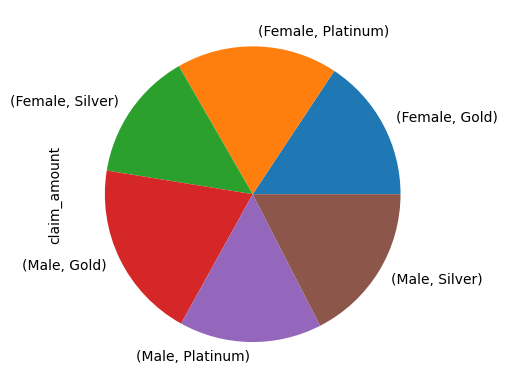

In [19]:
gender_segment_based_df = pd.DataFrame(gender_segment_based)  # converting the above series into a dataframe because pie chart cannot be plotted on a series
gender_segment_based_df.plot(kind = 'pie',subplots = True , legend = False)
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

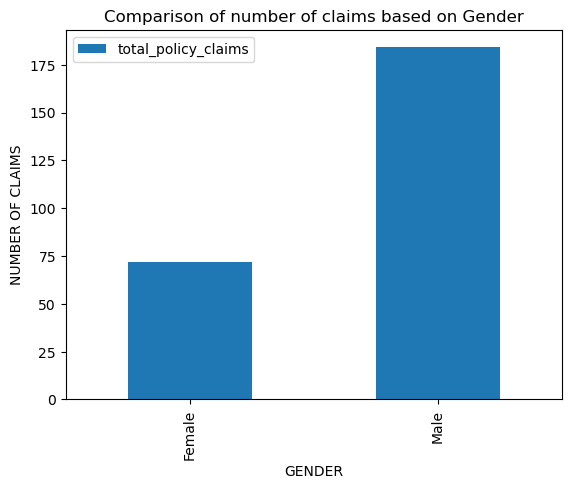

In [20]:
pd.pivot_table(combined_data[combined_data['incident_cause'].str.contains('Driver')], index = 'gender', values = 'total_policy_claims',aggfunc = 'count').plot(kind = 'bar')
plt.xlabel('GENDER')
plt.ylabel('NUMBER OF CLAIMS')
plt.title('Comparison of number of claims based on Gender')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [21]:
combined_data['Age_group'] = pd.cut(combined_data['Age'], bins = 8)
combined_data

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_flag,Age,Age_category,Age_group
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,1,40.0,Adult,"(37.5, 42.625]"
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,1,45.0,Adult,"(42.625, 47.75]"
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.0,Youth,"(27.25, 32.375]"
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0,47.0,Adult,"(42.625, 47.75]"
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,1,38.0,Adult,"(37.5, 42.625]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,1965-01-28,UT,5.175625e+09,Silver,1,53.0,Adult,"(52.875, 58.0]"
1074,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,1966-06-19,HI,4.577521e+09,Gold,0,52.0,Adult,"(47.75, 52.875]"
1075,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,1963-11-18,NC,6.432465e+09,Silver,1,54.0,Adult,"(52.875, 58.0]"
1076,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,1,22.0,Youth,"(16.959, 22.125]"


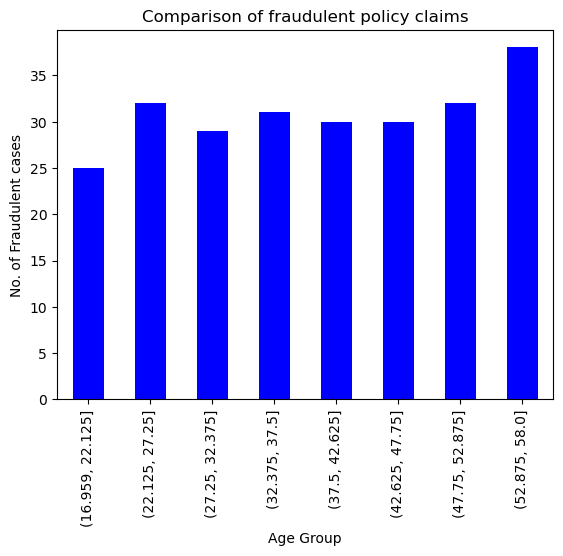

In [22]:
pd.pivot_table(combined_data[combined_data['fraudulent'] == 'Yes'],index = 'Age_group', values = 'fraudulent' ,aggfunc = 'count').plot(kind = 'bar',legend = False,color = 'blue')
plt.ylabel('No. of Fraudulent cases')
plt.xlabel('Age Group')
plt.title('Comparison of fraudulent policy claims')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [23]:
combined_data['month_name'] = combined_data['claim_date'].apply(lambda x : pd.Timestamp.strftime(x,format = '%B'))
monthly_claim_df = pd.DataFrame(combined_data.groupby('month_name')['claim_amount'].sum())
monthly_claim_df

,claim_amount
month_name,
April,1.276071e+06
August,9.112035e+05
December,6.967015e+05
February,1.133107e+06
January,1.332012e+06
July,1.379035e+06
June,1.276333e+06
March,1.320094e+06
May,1.114211e+06


In [24]:
order = ['January','February','March','April',
         'May','June','July','August','September','October','November','December']

In [25]:
monthly_claim_df = monthly_claim_df.loc[order]
monthly_claim_df

,claim_amount
month_name,
January,1.332012e+06
February,1.133107e+06
March,1.320094e+06
April,1.276071e+06
May,1.114211e+06
June,1.276333e+06
July,1.379035e+06
August,9.112035e+05
September,9.806480e+05


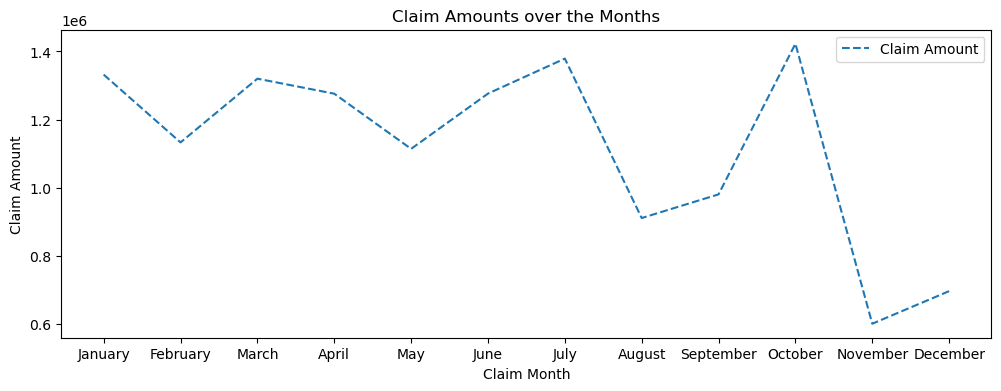

In [26]:
plt.figure(figsize=(12,4))
plt.plot(monthly_claim_df.index,monthly_claim_df['claim_amount'],label='Claim Amount',ls='--')
plt.xlabel("Claim Month")
plt.ylabel("Claim Amount")
plt.title('Claim Amounts over the Months')
plt.legend()
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

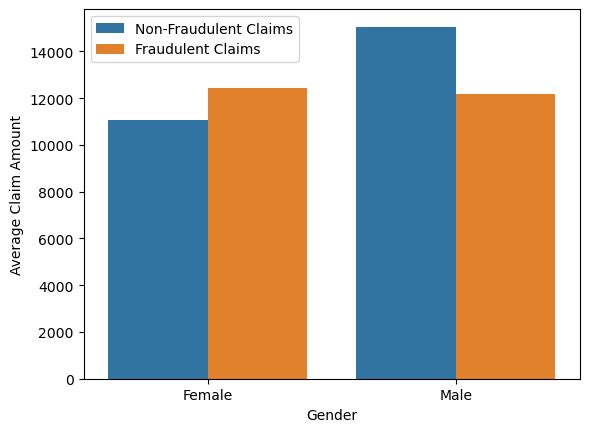

In [30]:
sns.barplot(combined_data,x = 'gender',y = "claim_amount",hue = 'fraudulent',estimator = "mean",errorbar = None )
plt.ylabel('Average Claim Amount')
plt.xlabel('Gender')
plt.legend(["Non-Fraudulent Claims","Fraudulent Claims"])
plt.show()

C:\Users\Anonymous\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


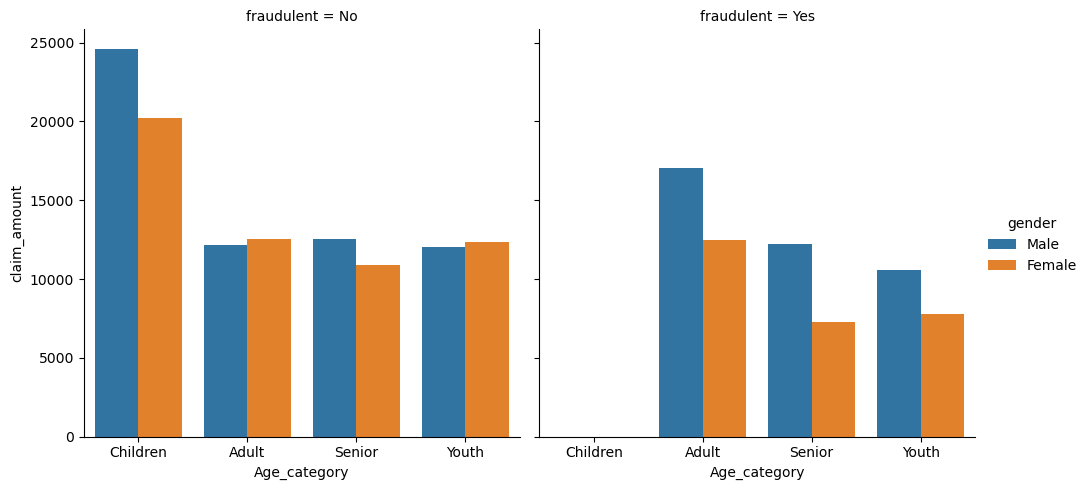

In [31]:
sns.catplot(combined_data.groupby(['gender','Age_category','fraudulent']).claim_amount.mean().reset_index().sort_values(by='claim_amount',ascending=False), \
            kind='bar',x='Age_category',y='claim_amount',hue='gender',col='fraudulent',errorbar=None,sharex=True)
plt.show()

 Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [34]:
from scipy.stats import ttest_ind

# Created two variables male_claims and female_claims
male_claims = combined_data[combined_data['gender'] == 'Male']['claim_amount']
female_claims = combined_data[combined_data['gender'] == 'Female']['claim_amount']

# Here we performed t-test for checking similarity
t_stat, p_value = ttest_ind(male_claims, female_claims)

# Showing the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - The claim amounts for males and females are not similar according to the test conducted.")
else:
    print("Fail to reject the null hypothesis - The claim amounts for males and females are similar according to the test conducted.")


t-statistic: 0.8848703612768547
p-value: 0.3764242430541366
Fail to reject the null hypothesis - The claim amounts for males and females are similar according to the test conducted.


### 17. Is there any relationship between age category and segment?

In [36]:
from scipy.stats import chi2_contingency

# Created a cross tab for further analysis
contingency_table = pd.crosstab(combined_data['Age_group'], combined_data['Segment'])

# chi-square test should be used here for verifying the test.
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant relationship between age group and segment.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between age group and segment.")


Chi-square statistic: 11.74261505944088
p-value: 0.6269641622724708
Fail to reject the null hypothesis - There is no significant relationship between age group and segment.


###  18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [38]:
claim_amt_2017  = combined_data.claim_amount[combined_data.claim_date.dt.year == 2017]
sample=claim_amt_2017.sample(50)  # Taking a sample from current year (2017-18)

#''' Assumptions:
#1. random sampling: done
#2. independence: done
#3. pop std unknown: done
#4. Normality: will check now 
#'''
# check for normality using Shapiro Wilk test 
# if p<0.05 not normal else it is normal
from scipy.stats import shapiro

shapiro_age = shapiro(sample)

print(shapiro_age)

# '''Since n>=30 i.e n=150 so because of CLT it is safe to ignore this violation.'''

import scipy.stats as stats

sample=claim_amt_2017.sample(150)
pop_mean=10000                         # Prev year (2016-17) avg claim amount. 
t_statistic, p_value = stats.ttest_1samp(sample,pop_mean)   

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)  # div by 2 bcz by default the func does two sided test and we need one tailed.

# Result:
#The p-value is lower than significance level of 0.05 hence *we reject the null*

# We found sufficient evidence (from the sample/data we used) to conclude that the avg claim amount for 2017-18
# is significantly more than 10000 which is of the previous year (2016-17).

# Hypothesis:
# Ho: The mean claim amount for the year 2017-18 is equal to $10,000.
# Ha: The mean claim amount for the year 2017-18 is greater than $10,000.

ShapiroResult(statistic=0.7883738279342651, pvalue=4.781038001056004e-07)
t-statistic: 3.2455115289452525
p-value: 0.0007239408214956657


### 19. Is there any difference between age groups and insurance claims?

In [41]:
combined_data.total_policy_claims = combined_data.total_policy_claims.astype('int')
# Perform chi-square test
observed = pd.crosstab(combined_data['Age_group'], combined_data['total_policy_claims'])
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


# Interpret the results
alpha = 0.05
print("\nSignificance level (alpha):", alpha)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between age groups and insurance claims.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between age groups and insurance claims.")

Chi-square statistic: 48.29498802815563
p-value: 0.501624605484573
Degrees of freedom: 49

Significance level (alpha): 0.05
p-value: 0.501624605484573
Fail to reject the null hypothesis. There is no statistically significant difference between age groups and insurance claims.


###  20. Is there any relationship between total number of policy claims and the claimed amount?

In [43]:
# Correlation analysis

# Ho: No significant correlation between total policy claims and claim amount
# Ha: There is significant correlation between total policy claims and claim amount

from scipy.stats import pearsonr
# Performing Pearson correlation test
correlation_coefficient, p_value = pearsonr(combined_data['total_policy_claims'], combined_data['claim_amount'])

# Printing correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# The corr coeff is very small and is negative indicating a very weak negative correlation between the the variables.

# The p value itself indicating that we fail to reject which means we have insufficient evidence to conclude that there is significant correlation between the two variables i.e the correlation is not statistically significant at 0.05 significance level.

Correlation Coefficient: -0.014800926105370111
P-value: 0.6273782545421859
